<a href="https://colab.research.google.com/github/ZahraTavakkol/Pong-Game/blob/master/MetaData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_selection import mutual_info_classif 

In [157]:
Path = '/content/'

PRJDB4176_MetaData_Path = Path + 'PRJDB4176.txt'
PRJEB10878_MetaData_Path = Path + 'PRJEB10878.txt'
PRJEB12449_MetaData_Path = Path + 'PRJEB12449.txt'
PRJEB27928_MetaData_Path = Path + 'PRJEB27928.txt'
PRJEB7774_MetaData_Path = Path + 'PRJEB7774.txt'
PRJEB6070_MetaData_Path = Path + 'PRJEB6070.txt'
PRJNA447983_MetaData_Path = Path + 'PRJNA447983.txt'

In [162]:
PRJDB4176_MetaData = pd.read_csv(PRJDB4176_MetaData_Path, sep='\t', index_col = False)
PRJEB10878_MetaData = pd.read_csv(PRJEB10878_MetaData_Path, sep='\t', index_col = False)
PRJEB12449_MetaData = pd.read_csv(PRJEB12449_MetaData_Path, sep='\t', index_col = False)
PRJEB27928_MetaData = pd.read_csv(PRJEB27928_MetaData_Path, sep='\t', index_col = False)
PRJEB7774_MetaData = pd.read_csv(PRJEB7774_MetaData_Path, sep='\t', index_col = False)
PRJEB6070_MetaData = pd.read_csv(PRJEB6070_MetaData_Path, sep='\t', index_col = False)
PRJNA447983_MetaData = pd.read_csv(PRJNA447983_MetaData_Path, sep='\t', index_col = False)

PRJDB4176_MetaData = PRJDB4176_MetaData.set_index(['Run_ID'])
PRJEB10878_MetaData = PRJEB10878_MetaData.set_index(['Run_ID'])
PRJEB12449_MetaData = PRJEB12449_MetaData.set_index(['Run_ID'])
PRJEB27928_MetaData = PRJEB27928_MetaData.set_index(['Run_ID'])
PRJEB7774_MetaData = PRJEB7774_MetaData.set_index(['Run_ID'])
PRJEB6070_MetaData = PRJEB6070_MetaData.set_index(['Run_ID'])
PRJNA447983_MetaData = PRJNA447983_MetaData.set_index(['Run_ID'])

PRJDB4176_MetaData['Phenotype'] = PRJDB4176_MetaData['Phenotype'].replace({'D015179' : 'Neoplasma', 'D006262': 'Health', 'D000236': 'Adenoma'}).values
PRJEB10878_MetaData['Phenotype'] = PRJEB10878_MetaData['Phenotype'].replace({'D015179' : 'Neoplasma', 'D006262': 'Health', 'D000236': 'Adenoma'}).values
PRJEB12449_MetaData['Phenotype'] = PRJEB12449_MetaData['Phenotype'].replace({'D015179' : 'Neoplasma', 'D006262': 'Health', 'D000236': 'Adenoma'}).values
PRJEB27928_MetaData['Phenotype'] = PRJEB27928_MetaData['Phenotype'].replace({'D015179' : 'Neoplasma', 'D006262': 'Health', 'D000236': 'Adenoma'}).values
PRJEB7774_MetaData['Phenotype'] = PRJEB7774_MetaData['Phenotype'].replace({'D015179' : 'Neoplasma', 'D006262': 'Health', 'D000236': 'Adenoma'}).values
PRJEB6070_MetaData['Phenotype'] = PRJEB6070_MetaData['Phenotype'].replace({'D015179' : 'Neoplasma', 'D006262': 'Health', 'D000236': 'Adenoma'}).values
PRJNA447983_MetaData['Phenotype'] = PRJNA447983_MetaData['Phenotype'].replace({'D015179' : 'Neoplasma', 'D006262': 'Health', 'D000236': 'Adenoma'}).values

PRJEB6070_MetaData = PRJEB6070_MetaData[PRJEB6070_MetaData['Country'] == 'France']

In [163]:
MetaData = pd.DataFrame([PRJDB4176_MetaData['Phenotype'].value_counts(), PRJEB10878_MetaData['Phenotype'].value_counts(),
              PRJEB12449_MetaData['Phenotype'].value_counts(), PRJEB27928_MetaData['Phenotype'].value_counts(),
              PRJEB7774_MetaData['Phenotype'].value_counts(), PRJEB6070_MetaData['Phenotype'].value_counts(),
              PRJNA447983_MetaData['Phenotype'].value_counts()], 
             index = ['PRJDB4176', 'PRJEB10878', 'PRJEB12449', 'PRJEB27928', 'PRJEB7774', 'PRJEB6070', 'PRJNA447983'])
MetaData = MetaData.fillna(0).astype(int)
MetaData['All Runs'] = MetaData.sum(axis = 1)
MetaData['Unique Rows'] = [PRJDB4176_MetaData.drop_duplicates().shape[0],
                           PRJEB10878_MetaData.drop_duplicates().shape[0],
                           PRJEB12449_MetaData.drop_duplicates().shape[0],
                           PRJEB27928_MetaData.drop_duplicates().shape[0],
                           PRJEB7774_MetaData.drop_duplicates().shape[0],
                           PRJEB6070_MetaData.drop_duplicates().shape[0],
                           PRJNA447983_MetaData.drop_duplicates().shape[0]]
MetaData['Unique Neoplasma'] = [PRJDB4176_MetaData[PRJDB4176_MetaData['Phenotype'] == 'Neoplasma'].drop_duplicates().shape[0],
                           PRJEB10878_MetaData[PRJEB10878_MetaData['Phenotype'] == 'Neoplasma'].drop_duplicates().shape[0],
                           PRJEB12449_MetaData[PRJEB12449_MetaData['Phenotype'] == 'Neoplasma'].drop_duplicates().shape[0],
                           PRJEB27928_MetaData[PRJEB27928_MetaData['Phenotype'] == 'Neoplasma'].drop_duplicates().shape[0],
                           PRJEB7774_MetaData[PRJEB7774_MetaData['Phenotype'] == 'Neoplasma'].drop_duplicates().shape[0],
                           PRJEB6070_MetaData[PRJEB6070_MetaData['Phenotype'] == 'Neoplasma'].drop_duplicates().shape[0],
                           PRJNA447983_MetaData[PRJNA447983_MetaData['Phenotype'] == 'Neoplasma'].drop_duplicates().shape[0]]
MetaData['Unique Health'] = [PRJDB4176_MetaData[PRJDB4176_MetaData['Phenotype'] == 'Health'].drop_duplicates().shape[0],
                           PRJEB10878_MetaData[PRJEB10878_MetaData['Phenotype'] == 'Health'].drop_duplicates().shape[0],
                           PRJEB12449_MetaData[PRJEB12449_MetaData['Phenotype'] == 'Health'].drop_duplicates().shape[0],
                           PRJEB27928_MetaData[PRJEB27928_MetaData['Phenotype'] == 'Health'].drop_duplicates().shape[0],
                           PRJEB7774_MetaData[PRJEB7774_MetaData['Phenotype'] == 'Health'].drop_duplicates().shape[0],
                           PRJEB6070_MetaData[PRJEB6070_MetaData['Phenotype'] == 'Health'].drop_duplicates().shape[0],
                           PRJNA447983_MetaData[PRJNA447983_MetaData['Phenotype'] == 'Health'].drop_duplicates().shape[0]]
MetaData['Unique Adenoma'] = [PRJDB4176_MetaData[PRJDB4176_MetaData['Phenotype'] == 'Adenoma'].drop_duplicates().shape[0],
                           PRJEB10878_MetaData[PRJEB10878_MetaData['Phenotype'] == 'Adenoma'].drop_duplicates().shape[0],
                           PRJEB12449_MetaData[PRJEB12449_MetaData['Phenotype'] == 'Adenoma'].drop_duplicates().shape[0],
                           PRJEB27928_MetaData[PRJEB27928_MetaData['Phenotype'] == 'Adenoma'].drop_duplicates().shape[0],
                           PRJEB7774_MetaData[PRJEB7774_MetaData['Phenotype'] == 'Adenoma'].drop_duplicates().shape[0],
                           PRJEB6070_MetaData[PRJEB6070_MetaData['Phenotype'] == 'Adenoma'].drop_duplicates().shape[0],
                           PRJNA447983_MetaData[PRJNA447983_MetaData['Phenotype'] == 'Adenoma'].drop_duplicates().shape[0]]
display(MetaData)

,Neoplasma,Health,Adenoma,All Runs,Unique Rows,Unique Neoplasma,Unique Health,Unique Adenoma
PRJDB4176,258,252,0,510,510,258,252,0
PRJEB10878,74,54,0,128,128,74,54,0
PRJEB12449,209,208,0,417,104,52,52,0
PRJEB27928,70,60,0,130,82,22,60,0
PRJEB7774,46,63,47,156,156,46,63,47
PRJEB6070,146,205,110,461,156,53,61,42
PRJNA447983,61,52,27,140,140,61,52,27


In [164]:
MetaData = pd.DataFrame([PRJDB4176_MetaData['Sex'].value_counts(), PRJEB10878_MetaData['Sex'].value_counts(),
              PRJEB12449_MetaData['Sex'].value_counts(), PRJEB27928_MetaData['Sex'].value_counts(),
              PRJEB7774_MetaData['Sex'].value_counts(), PRJEB6070_MetaData['Sex'].value_counts(),
              PRJNA447983_MetaData['Sex'].value_counts()], 
             index = ['PRJDB4176', 'PRJEB10878', 'PRJEB12449', 'PRJEB27928', 'PRJEB7774', 'PRJEB6070', 'PRJNA447983'])
Male_MetaData = pd.DataFrame([PRJDB4176_MetaData[PRJDB4176_MetaData['Sex'] == 'Male']['Phenotype'].value_counts(),
                           PRJEB10878_MetaData[PRJEB10878_MetaData['Sex'] == 'Male']['Phenotype'].value_counts(),
                           PRJEB12449_MetaData[PRJEB12449_MetaData['Sex'] == 'Male']['Phenotype'].value_counts(),
                           PRJEB27928_MetaData[PRJEB27928_MetaData['Sex'] == 'Male']['Phenotype'].value_counts(),
                           PRJEB7774_MetaData[PRJEB7774_MetaData['Sex'] == 'Male']['Phenotype'].value_counts(),
                           PRJEB6070_MetaData[PRJEB6070_MetaData['Sex'] == 'Male']['Phenotype'].value_counts(),
                           PRJNA447983_MetaData[PRJNA447983_MetaData['Sex'] == 'Male']['Phenotype'].value_counts()],
                           index = ['PRJDB4176', 'PRJEB10878', 'PRJEB12449', 'PRJEB27928', 'PRJEB7774', 'PRJEB6070', 'PRJNA447983'])
Male_MetaData.columns = ['Cancer Male', 'Health Male', 'Adenoma Male']
female_MetaData = pd.DataFrame([PRJDB4176_MetaData[PRJDB4176_MetaData['Sex'] == 'Female']['Phenotype'].value_counts(),
              PRJEB10878_MetaData[PRJEB10878_MetaData['Sex'] == 'Female']['Phenotype'].value_counts(),
              PRJEB12449_MetaData[PRJEB12449_MetaData['Sex'] == 'Female']['Phenotype'].value_counts(),
              PRJEB27928_MetaData[PRJEB27928_MetaData['Sex'] == 'Female']['Phenotype'].value_counts(),
              PRJEB7774_MetaData[PRJEB7774_MetaData['Sex'] == 'Female']['Phenotype'].value_counts(),
              PRJEB6070_MetaData[PRJEB6070_MetaData['Sex'] == 'Female']['Phenotype'].value_counts(),
              PRJNA447983_MetaData[PRJNA447983_MetaData['Sex'] == 'Female']['Phenotype'].value_counts()],
              index = ['PRJDB4176', 'PRJEB10878', 'PRJEB12449', 'PRJEB27928', 'PRJEB7774', 'PRJEB6070', 'PRJNA447983'])
female_MetaData.columns = ['Cancer Female', 'Health Female', 'Adenoma Female']
MetaData = pd.concat([MetaData, Male_MetaData.iloc[:,:2], female_MetaData.iloc[:,:2]], axis = 1)
MetaData = MetaData.fillna(0).astype(int)
display(MetaData)

,Male,Female,Cancer Male,Health Male,Cancer Female,Health Female
PRJDB4176,297,213,161,136,116,97
PRJEB10878,81,47,48,33,21,26
PRJEB12449,297,120,149,148,60,60
PRJEB27928,76,54,44,32,28,26
PRJEB7774,88,68,28,37,26,18
PRJEB6070,259,202,82,94,111,64
PRJNA447983,52,28,23,13,11,6


In [166]:
feature = 'Age'
# feature = 'BMI'
PRJDB4176_MetaData.loc[PRJDB4176_MetaData['Sex'] == 'Male', feature] = PRJDB4176_MetaData.loc[PRJDB4176_MetaData['Sex'] == 'Male', feature].fillna(PRJDB4176_MetaData.loc[PRJDB4176_MetaData['Sex'] == 'Male', feature].mean())
PRJDB4176_MetaData.loc[PRJDB4176_MetaData['Sex'] == 'Female', feature] = PRJDB4176_MetaData.loc[PRJDB4176_MetaData['Sex'] == 'Female', feature].fillna(PRJDB4176_MetaData.loc[PRJDB4176_MetaData['Sex'] == 'Female', feature].mean())

PRJEB10878_MetaData.loc[PRJEB10878_MetaData['Sex'] == 'Male', feature] = PRJEB10878_MetaData.loc[PRJEB10878_MetaData['Sex'] == 'Male', feature].fillna(PRJEB10878_MetaData.loc[PRJEB10878_MetaData['Sex'] == 'Male', feature].mean())
PRJEB10878_MetaData.loc[PRJEB10878_MetaData['Sex'] == 'Female', feature] = PRJEB10878_MetaData.loc[PRJEB10878_MetaData['Sex'] == 'Female', feature].fillna(PRJEB10878_MetaData.loc[PRJEB10878_MetaData['Sex'] == 'Female', feature].mean())

PRJEB12449_MetaData.loc[PRJEB12449_MetaData['Sex'] == 'Male', feature] = PRJEB12449_MetaData.loc[PRJEB12449_MetaData['Sex'] == 'Male', feature].fillna(PRJEB12449_MetaData.loc[PRJEB12449_MetaData['Sex'] == 'Male', feature].mean())
PRJEB12449_MetaData.loc[PRJEB12449_MetaData['Sex'] == 'Female', feature] = PRJEB12449_MetaData.loc[PRJEB12449_MetaData['Sex'] == 'Female', feature].fillna(PRJEB12449_MetaData.loc[PRJEB12449_MetaData['Sex'] == 'Female', feature].mean())

PRJEB27928_MetaData.loc[PRJEB27928_MetaData['Sex'] == 'Male', feature] = PRJEB27928_MetaData.loc[PRJEB27928_MetaData['Sex'] == 'Male', feature].fillna(PRJEB27928_MetaData.loc[PRJEB27928_MetaData['Sex'] == 'Male', feature].mean())
PRJEB27928_MetaData.loc[PRJEB27928_MetaData['Sex'] == 'Female', feature] = PRJEB27928_MetaData.loc[PRJEB27928_MetaData['Sex'] == 'Female', feature].fillna(PRJEB27928_MetaData.loc[PRJEB27928_MetaData['Sex'] == 'Female', feature].mean())

PRJEB7774_MetaData.loc[PRJEB7774_MetaData['Sex'] == 'Male', feature] = PRJEB7774_MetaData.loc[PRJEB7774_MetaData['Sex'] == 'Male', feature].fillna(PRJEB7774_MetaData.loc[PRJEB7774_MetaData['Sex'] == 'Male', feature].mean())
PRJEB7774_MetaData.loc[PRJEB7774_MetaData['Sex'] == 'Female', feature] = PRJEB7774_MetaData.loc[PRJEB7774_MetaData['Sex'] == 'Female', feature].fillna(PRJEB7774_MetaData.loc[PRJEB7774_MetaData['Sex'] == 'Female', feature].mean())

PRJEB6070_MetaData.loc[PRJEB6070_MetaData['Sex'] == 'Male', feature] = PRJEB6070_MetaData.loc[PRJEB6070_MetaData['Sex'] == 'Male', feature].fillna(PRJEB6070_MetaData.loc[PRJEB6070_MetaData['Sex'] == 'Male', feature].mean())
PRJEB6070_MetaData.loc[PRJEB6070_MetaData['Sex'] == 'Female', feature] = PRJEB6070_MetaData.loc[PRJEB6070_MetaData['Sex'] == 'Female', feature].fillna(PRJEB6070_MetaData.loc[PRJEB6070_MetaData['Sex'] == 'Female', feature].mean())

PRJNA447983_MetaData.loc[PRJNA447983_MetaData['Sex'] == 'Male', feature] = PRJNA447983_MetaData.loc[PRJNA447983_MetaData['Sex'] == 'Male', feature].fillna(PRJNA447983_MetaData.loc[PRJNA447983_MetaData['Sex'] == 'Male', feature].mean())
PRJNA447983_MetaData.loc[PRJNA447983_MetaData['Sex'] == 'Female', feature] = PRJNA447983_MetaData.loc[PRJNA447983_MetaData['Sex'] == 'Female', feature].fillna(PRJNA447983_MetaData.loc[PRJNA447983_MetaData['Sex'] == 'Female', feature].mean())

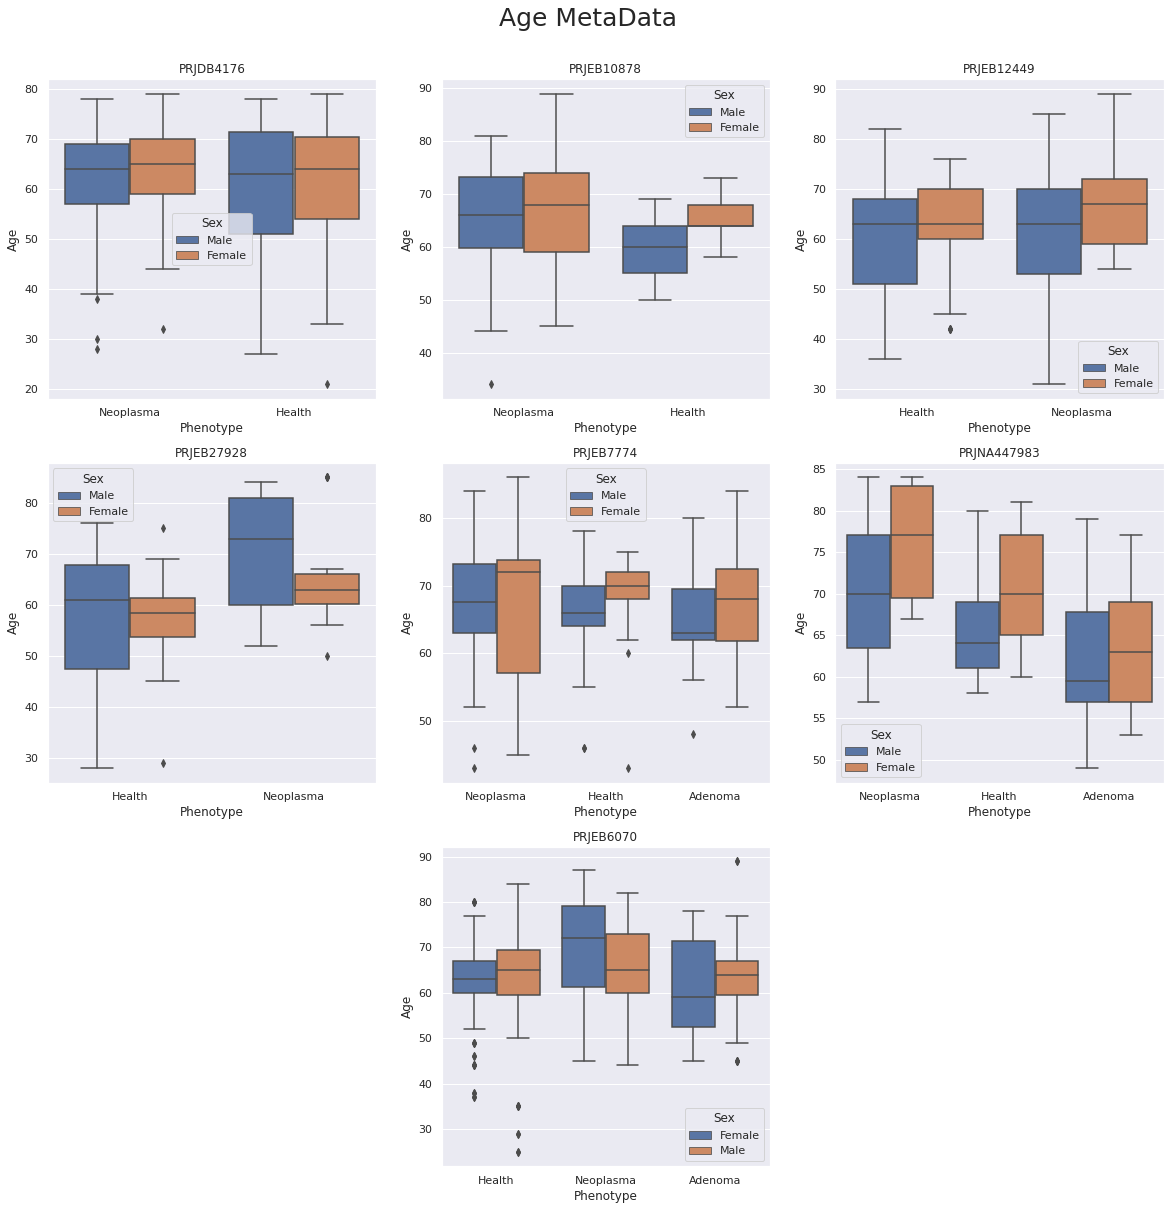

In [235]:
fig, axs = plt.subplots(3, 3)
sns.set(rc = {'figure.figsize':(20,20)})
sns.set_style("darkgrid")
fig.suptitle('Age MetaData', y = 0.93, fontsize = 25)
sns.boxplot(x=PRJDB4176_MetaData["Phenotype"], y=PRJDB4176_MetaData["Age"], hue=PRJDB4176_MetaData["Sex"], ax=axs[0,0], orient = 'v').set(title='PRJDB4176')
sns.boxplot(x=PRJEB10878_MetaData["Phenotype"], y=PRJEB10878_MetaData["Age"], hue=PRJEB10878_MetaData["Sex"], ax=axs[0,1], orient = 'v').set(title='PRJEB10878')
sns.boxplot(x=PRJEB12449_MetaData["Phenotype"], y=PRJEB12449_MetaData["Age"], hue=PRJEB12449_MetaData["Sex"], ax=axs[0,2], orient = 'v').set(title='PRJEB12449')
sns.boxplot(x=PRJEB27928_MetaData["Phenotype"], y=PRJEB27928_MetaData["Age"], hue=PRJEB27928_MetaData["Sex"], ax=axs[1,0], orient = 'v').set(title='PRJEB27928')
sns.boxplot(x=PRJEB7774_MetaData["Phenotype"], y=PRJEB7774_MetaData["Age"], hue=PRJEB7774_MetaData["Sex"], ax=axs[1,1], orient = 'v').set(title='PRJEB7774')
sns.boxplot(x=PRJNA447983_MetaData["Phenotype"], y=PRJNA447983_MetaData["Age"], hue=PRJNA447983_MetaData["Sex"], ax=axs[1,2], orient = 'v').set(title='PRJNA447983')
sns.boxplot(x=PRJEB6070_MetaData["Phenotype"], y=PRJEB6070_MetaData["Age"], hue=PRJEB6070_MetaData["Sex"], ax=axs[2,1], orient = 'v').set(title='PRJEB6070')
fig.delaxes(axs[2,0])
fig.delaxes(axs[2,2])
plt.show()

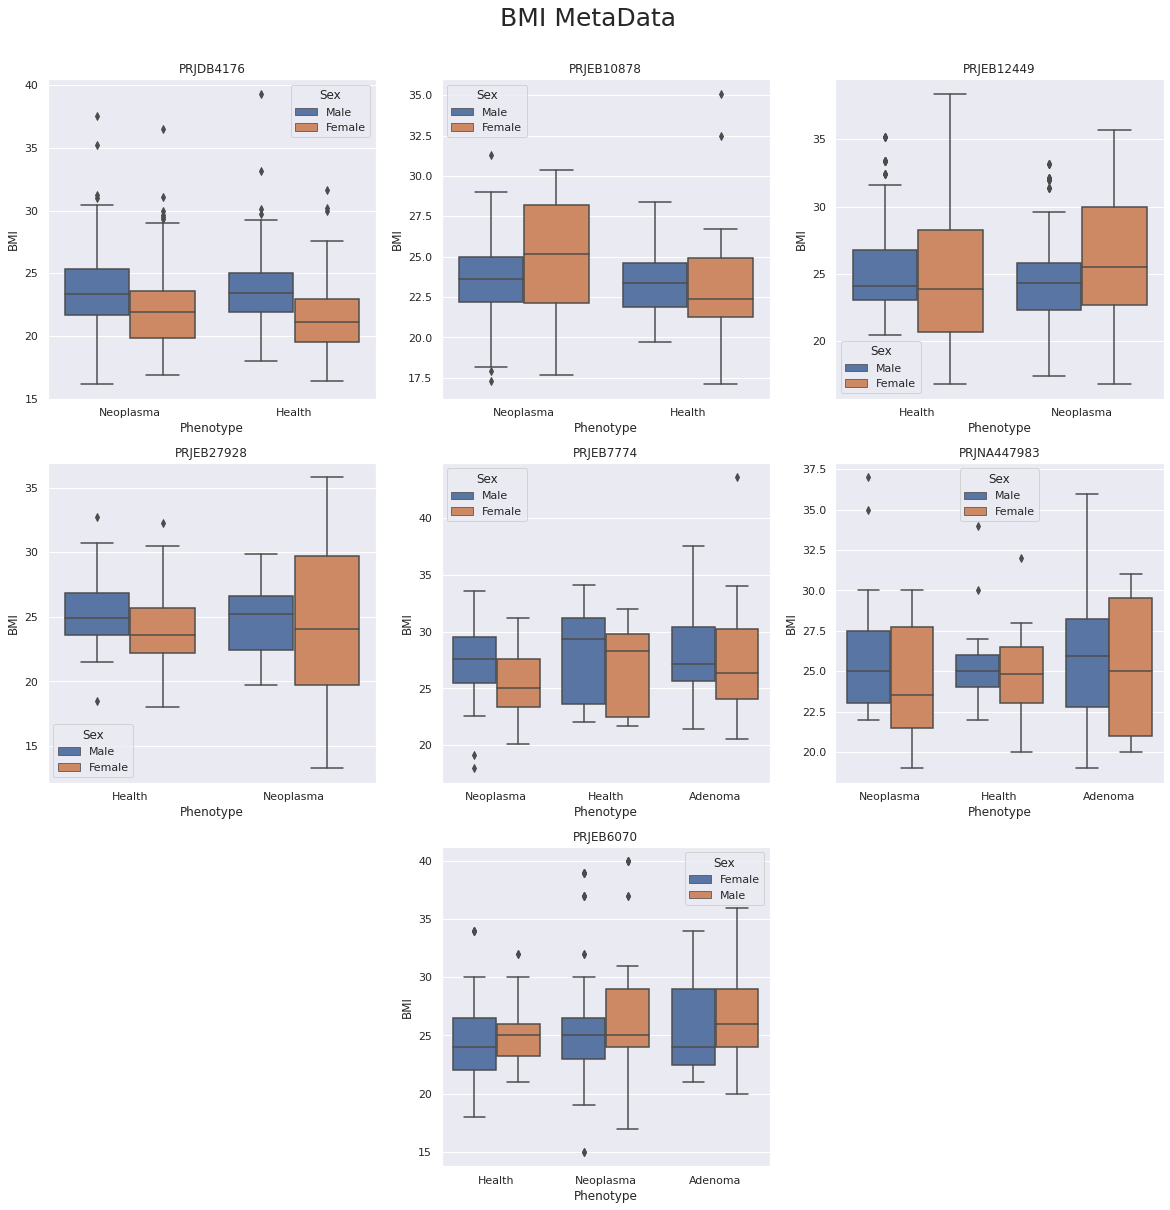

In [236]:
fig, axs = plt.subplots(3, 3)
sns.set(rc = {'figure.figsize':(20,20)})
sns.set_style("darkgrid")
fig.suptitle('BMI MetaData', y = 0.93, fontsize = 25)
sns.boxplot(x=PRJDB4176_MetaData["Phenotype"], y=PRJDB4176_MetaData["BMI"], hue=PRJDB4176_MetaData["Sex"], ax=axs[0,0], orient = 'v').set(title='PRJDB4176')
sns.boxplot(x=PRJEB10878_MetaData["Phenotype"], y=PRJEB10878_MetaData["BMI"], hue=PRJEB10878_MetaData["Sex"], ax=axs[0,1], orient = 'v').set(title='PRJEB10878')
sns.boxplot(x=PRJEB12449_MetaData["Phenotype"], y=PRJEB12449_MetaData["BMI"], hue=PRJEB12449_MetaData["Sex"], ax=axs[0,2], orient = 'v').set(title='PRJEB12449')
sns.boxplot(x=PRJEB27928_MetaData["Phenotype"], y=PRJEB27928_MetaData["BMI"], hue=PRJEB27928_MetaData["Sex"], ax=axs[1,0], orient = 'v').set(title='PRJEB27928')
sns.boxplot(x=PRJEB7774_MetaData["Phenotype"], y=PRJEB7774_MetaData["BMI"], hue=PRJEB7774_MetaData["Sex"], ax=axs[1,1], orient = 'v').set(title='PRJEB7774')
sns.boxplot(x=PRJNA447983_MetaData["Phenotype"], y=PRJNA447983_MetaData["BMI"], hue=PRJNA447983_MetaData["Sex"], ax=axs[1,2], orient = 'v').set(title='PRJNA447983')
sns.boxplot(x=PRJEB6070_MetaData["Phenotype"], y=PRJEB6070_MetaData["BMI"], hue=PRJEB6070_MetaData["Sex"], ax=axs[2,1], orient = 'v').set(title='PRJEB6070')
fig.delaxes(axs[2,0])
fig.delaxes(axs[2,2])
plt.show()